In [252]:
import numpy as np
import pandas as pd

from statistics import variance
 
import matplotlib.pyplot as plt

import seaborn as sns

import warnings

import sys
import os

In [253]:
warnings.filterwarnings("ignore")

In [254]:
SHARED_PATH = os.path.join(os.getcwd(), 'passengers.shared.py')

IMPORT_LIST_PATHS = [SHARED_PATH]

for path in IMPORT_LIST_PATHS:
  with open(path) as file:
      exec(file.read())

In [255]:
PASSENGERS_PATH = './passengers.csv'
PASSENGERS_2_PATH = './passengers2.csv'

In [256]:
df = pd.read_csv(PASSENGERS_PATH)
df_2 = pd.read_csv(PASSENGERS_2_PATH)

df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


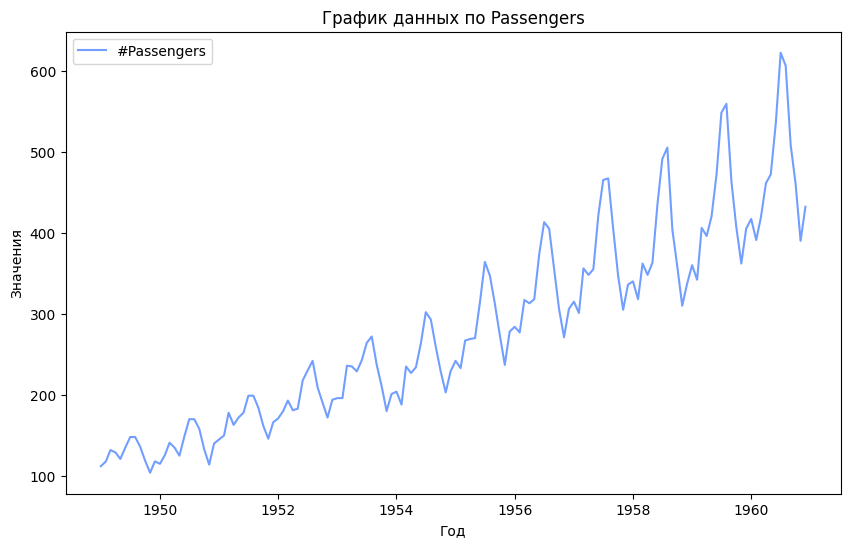

In [257]:
df['Month'] = pd.to_datetime(df['Month'])

plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['#Passengers'], label='#Passengers', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.title(f'График данных по Passengers')
plt.xlabel('Год')
plt.ylabel('Значения')
plt.legend()
plt.show()

In [258]:
df['month_number'] = pd.DatetimeIndex(df['Month']).month

df['month_number']

0       1
1       2
2       3
3       4
4       5
       ..
139     8
140     9
141    10
142    11
143    12
Name: month_number, Length: 144, dtype: int32

In [259]:
df_january = df[df['month_number'] == 1]

df_january

,Month,#Passengers,month_number
0,1949-01-01,112,1
12,1950-01-01,115,1
24,1951-01-01,145,1
36,1952-01-01,171,1
48,1953-01-01,196,1
60,1954-01-01,204,1
72,1955-01-01,242,1
84,1956-01-01,284,1
96,1957-01-01,315,1
108,1958-01-01,340,1


In [260]:
df_july =  df[df['month_number'] == 7]

df_july

,Month,#Passengers,month_number
6,1949-07-01,148,7
18,1950-07-01,170,7
30,1951-07-01,199,7
42,1952-07-01,230,7
54,1953-07-01,264,7
66,1954-07-01,302,7
78,1955-07-01,364,7
90,1956-07-01,413,7
102,1957-07-01,465,7
114,1958-07-01,491,7


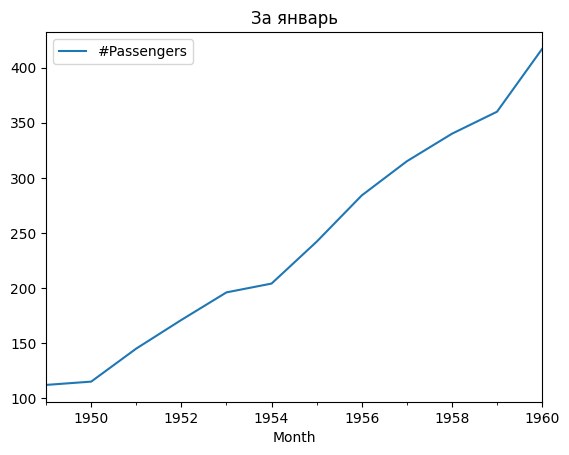

In [261]:
df_january.plot(x = 'Month', y = "#Passengers")

plt.title('За январь')
plt.show()

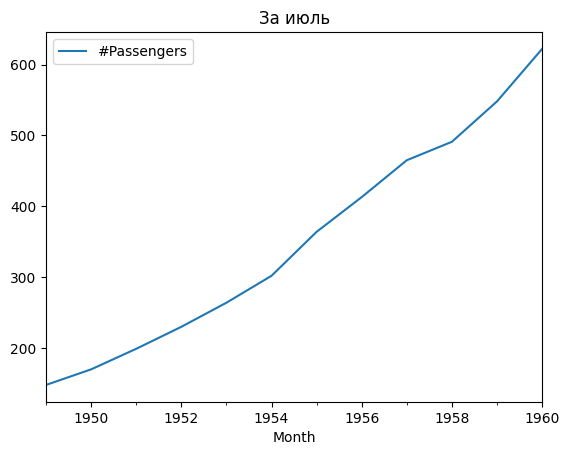

In [262]:
df_july.plot(x = 'Month', y = "#Passengers")

plt.title('За июль')
plt.show()

Заметим линейный ежегодный рост

In [263]:
df['year'] = pd.DatetimeIndex(df['Month']).year

df

,Month,#Passengers,month_number,year
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


In [264]:
for year in df['year'].unique():
    __df_current_year = df[df['year'] == year]
    
    print(f"Среднее за {year} год:", round(__df_current_year['#Passengers'].mean()))
    print(f"Дисперсия за {year} год:", variance(round(__df_current_year['#Passengers'])))
    print('\n')

Среднее за 1949 год: 127
Дисперсия за 1949 год: 188.24242424242425


Среднее за 1950 год: 140
Дисперсия за 1950 год: 363.6969696969697


Среднее за 1951 год: 170
Дисперсия за 1951 год: 339.969696969697


Среднее за 1952 год: 197
Дисперсия за 1952 год: 527.4545454545455


Среднее за 1953 год: 225
Дисперсия за 1953 год: 810.3636363636364


Среднее за 1954 год: 239
Дисперсия за 1954 год: 1219.719696969697


Среднее за 1955 год: 284
Дисперсия за 1955 год: 1775.8181818181818


Среднее за 1956 год: 328
Дисперсия за 1956 год: 2290.75


Среднее за 1957 год: 368
Дисперсия за 1957 год: 3351.3560606060605


Среднее за 1958 год: 381
Дисперсия за 1958 год: 4164.181818181818


Среднее за 1959 год: 428
Дисперсия за 1959 год: 4876.242424242424


Среднее за 1960 год: 476
Дисперсия за 1960 год: 6043.060606060606




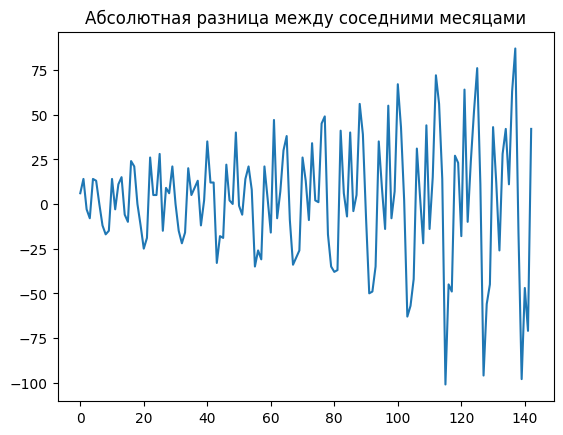

In [265]:
passengers_diff = []

for i in range(1, len(df)):
    passengers_diff.append(df['#Passengers'][i] - df['#Passengers'][i - 1])

plt.title('Абсолютная разница между соседними месяцами')    
plt.plot(range(len(df) - 1), passengers_diff)
plt.show()

Заметим тенденцию, что при резком росте, сразу замечается резкое падение, которое еще сильнее по сравнению с ростом. 

Также с ростом времени повышается дисперсия

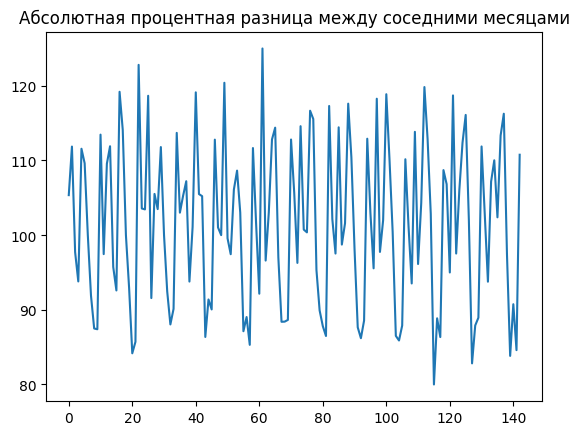

In [266]:
passengers_diff_percent = []

for i in range(1, len(df)):
    passengers_diff_percent.append(df['#Passengers'][i] / df['#Passengers'][i - 1] * 100)

plt.title('Абсолютная процентная разница между соседними месяцами')    
plt.plot(range(len(df) - 1), passengers_diff_percent)
plt.show()

По сравнению с абсолютной разницей, в процентной рост не такой заметный. 

В основном, отклонения составляют 20% для роста (100 + 20 = 120) и падений (100 - 20 = 80)

## Повышение и понижение частот непрерывности

In [267]:
df_for_sample = df.copy()
df_for_sample['date'] = pd.DatetimeIndex(df_for_sample['Month'])

df_for_sample.drop(columns=['Month', 'month_number', 'year'], inplace=True)
df_for_sample.set_index('date', inplace=True)

df_for_sample

,#Passengers
date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Понизили до года

In [268]:
df_downsampled_y = df_for_sample['#Passengers'].resample('Y').sum()

df_downsampled_y

date
1949-12-31    1520
1950-12-31    1676
1951-12-31    2042
1952-12-31    2364
1953-12-31    2700
1954-12-31    2867
1955-12-31    3408
1956-12-31    3939
1957-12-31    4421
1958-12-31    4572
1959-12-31    5140
1960-12-31    5714
Freq: YE-DEC, Name: #Passengers, dtype: int64

Понизили до квартала

In [269]:
df_downsampled_q = df_for_sample['#Passengers'].resample('Q').sum()

df_downsampled_q

date
1949-03-31     362
1949-06-30     385
1949-09-30     432
1949-12-31     341
1950-03-31     382
1950-06-30     409
1950-09-30     498
1950-12-31     387
1951-03-31     473
1951-06-30     513
1951-09-30     582
1951-12-31     474
1952-03-31     544
1952-06-30     582
1952-09-30     681
1952-12-31     557
1953-03-31     628
1953-06-30     707
1953-09-30     773
1953-12-31     592
1954-03-31     627
1954-06-30     725
1954-09-30     854
1954-12-31     661
1955-03-31     742
1955-06-30     854
1955-09-30    1023
1955-12-31     789
1956-03-31     878
1956-06-30    1005
1956-09-30    1173
1956-12-31     883
1957-03-31     972
1957-06-30    1125
1957-09-30    1336
1957-12-31     988
1958-03-31    1020
1958-06-30    1146
1958-09-30    1400
1958-12-31    1006
1959-03-31    1108
1959-06-30    1288
1959-09-30    1570
1959-12-31    1174
1960-03-31    1227
1960-06-30    1468
1960-09-30    1736
1960-12-31    1283
Freq: QE-DEC, Name: #Passengers, dtype: int64

Повысили до дня последующие значения (на основе предыдущих)

In [270]:
df_oversampled_next_d = df_for_sample['#Passengers'].resample('D').bfill()

df_oversampled_next_d

date
1949-01-01    112
1949-01-02    118
1949-01-03    118
1949-01-04    118
1949-01-05    118
             ... 
1960-11-27    432
1960-11-28    432
1960-11-29    432
1960-11-30    432
1960-12-01    432
Freq: D, Name: #Passengers, Length: 4353, dtype: int64

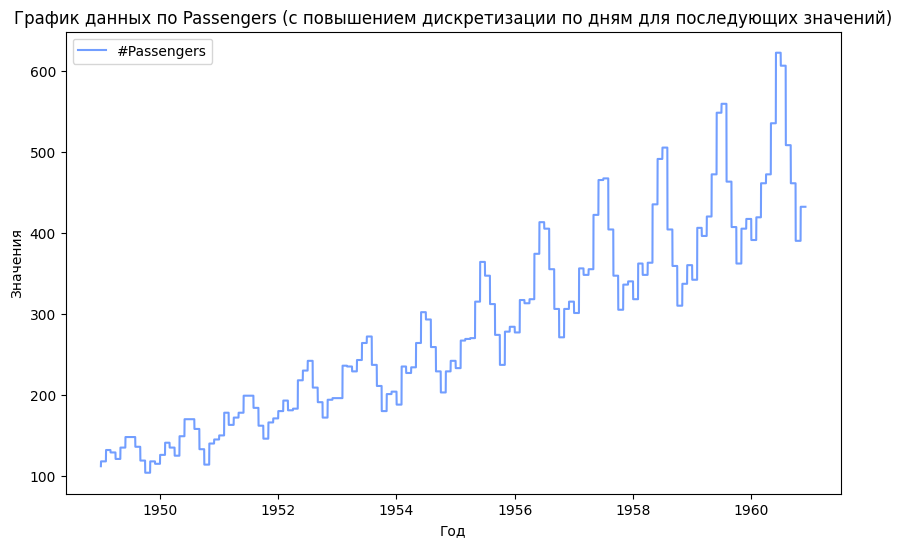

In [271]:
plt.figure(figsize=(10, 6))
plt.plot(df_oversampled_next_d.index, df_oversampled_next_d.values, label='#Passengers', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.title(f'График данных по Passengers (с повышением дискретизации по дням для последующих значений)')
plt.xlabel('Год')
plt.ylabel('Значения')
plt.legend()
plt.show()

Заполнение предыдущих значения (на основе следующих)

In [272]:
df_oversampled_prev_d = df_for_sample['#Passengers'].resample('D').ffill()

df_oversampled_prev_d

date
1949-01-01    112
1949-01-02    112
1949-01-03    112
1949-01-04    112
1949-01-05    112
             ... 
1960-11-27    390
1960-11-28    390
1960-11-29    390
1960-11-30    390
1960-12-01    432
Freq: D, Name: #Passengers, Length: 4353, dtype: int64

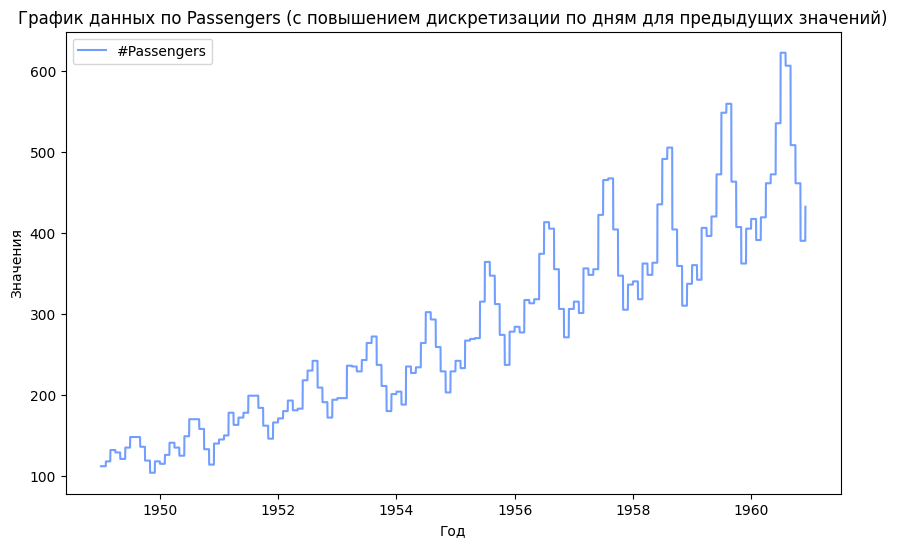

In [273]:
plt.figure(figsize=(10, 6))
plt.plot(df_oversampled_prev_d.index, df_oversampled_prev_d.values, label='#Passengers', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.title(f'График данных по Passengers (с повышением дискретизации по дням для предыдущих значений)')
plt.xlabel('Год')
plt.ylabel('Значения')
plt.legend()
plt.show()

In [274]:
df_oversampled_next_w = df_for_sample['#Passengers'].resample('W').bfill()

df_oversampled_next_w

date
1949-01-02    118.0
1949-01-09    118.0
1949-01-16    118.0
1949-01-23    118.0
1949-01-30    118.0
              ...  
1960-11-06    432.0
1960-11-13    432.0
1960-11-20    432.0
1960-11-27    432.0
1960-12-04      NaN
Freq: W-SUN, Name: #Passengers, Length: 623, dtype: float64

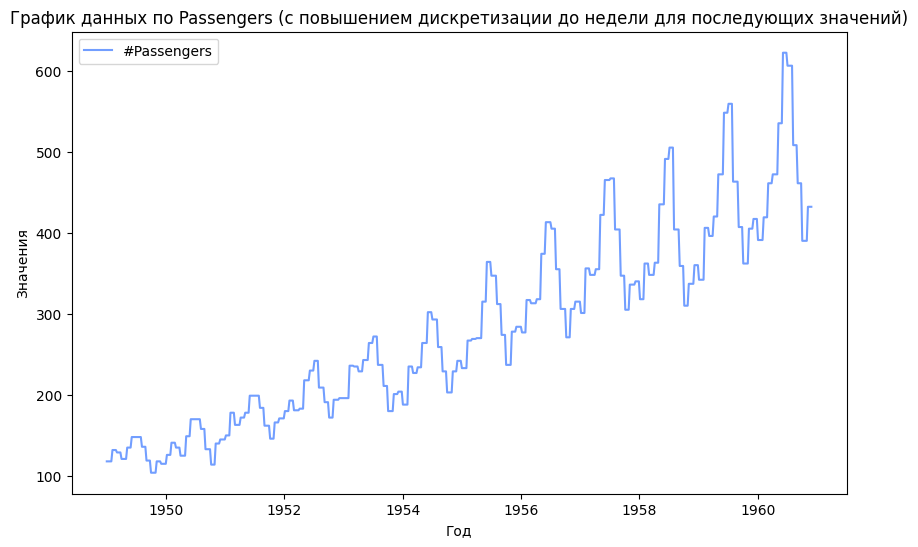

In [275]:
plt.figure(figsize=(10, 6))
plt.plot(df_oversampled_next_w.index, df_oversampled_next_w.values, label='#Passengers', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.title(f'График данных по Passengers (с повышением дискретизации до недели для последующих значений)')
plt.xlabel('Год')
plt.ylabel('Значения')
plt.legend()
plt.show()

In [276]:
df_oversampled_prev_w = df_for_sample['#Passengers'].resample('W').ffill()

df_oversampled_prev_w

date
1949-01-02    112
1949-01-09    112
1949-01-16    112
1949-01-23    112
1949-01-30    112
             ... 
1960-11-06    390
1960-11-13    390
1960-11-20    390
1960-11-27    390
1960-12-04    432
Freq: W-SUN, Name: #Passengers, Length: 623, dtype: int64

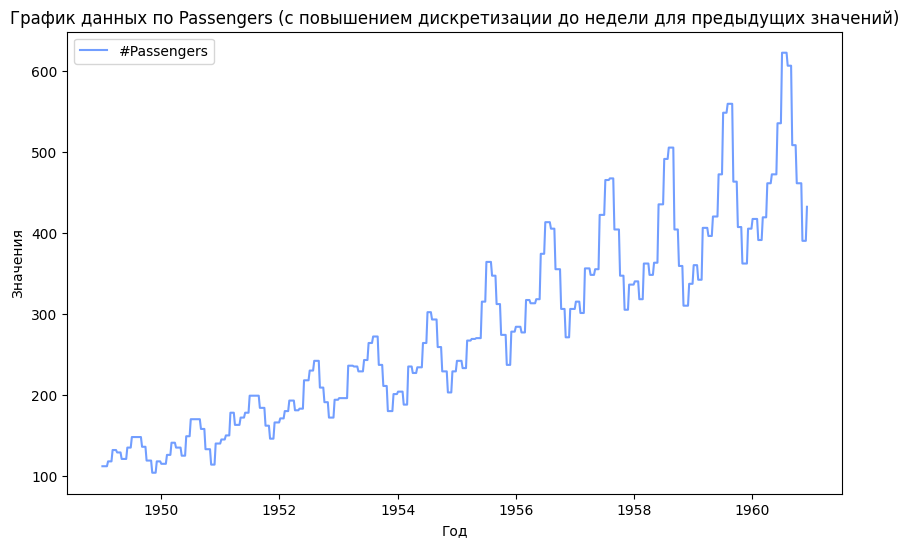

In [277]:
plt.figure(figsize=(10, 6))
plt.plot(df_oversampled_prev_w.index, df_oversampled_prev_w.values, label='#Passengers', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.title(f'График данных по Passengers (с повышением дискретизации до недели для предыдущих значений)')
plt.xlabel('Год')
plt.ylabel('Значения')
plt.legend()
plt.show()

In [278]:
df_resample_d_mean = pd.DataFrame(df_for_sample['#Passengers'].resample('D').mean())
df_resample_d_mean['date'] = df_resample_d_mean.index
df_resample_d_mean.reset_index(drop=True, inplace=True)

df_resample_d_mean

,#Passengers,date
0,112.0,1949-01-01
1,NaN,1949-01-02
2,NaN,1949-01-03
3,NaN,1949-01-04
4,NaN,1949-01-05
...,...,...
4348,NaN,1960-11-27
4349,NaN,1960-11-28
4350,NaN,1960-11-29
4351,NaN,1960-11-30


Все NaN будем заменять на среднее за год

In [279]:
df_resample_d_mean_passengers_column = df_resample_d_mean.groupby(df_resample_d_mean["date"].dt.year)["#Passengers"]
df_resample_d_mean_passengers_column = df_resample_d_mean_passengers_column.transform(lambda x: x.fillna(x.mean()))

df_resample_d_mean["passengers_mean_y"] = df_resample_d_mean_passengers_column

df_resample_d_mean

,#Passengers,date,passengers_mean_y
0,112.0,1949-01-01,112.000000
1,NaN,1949-01-02,126.666667
2,NaN,1949-01-03,126.666667
3,NaN,1949-01-04,126.666667
4,NaN,1949-01-05,126.666667
...,...,...,...
4348,NaN,1960-11-27,476.166667
4349,NaN,1960-11-28,476.166667
4350,NaN,1960-11-29,476.166667
4351,NaN,1960-11-30,476.166667


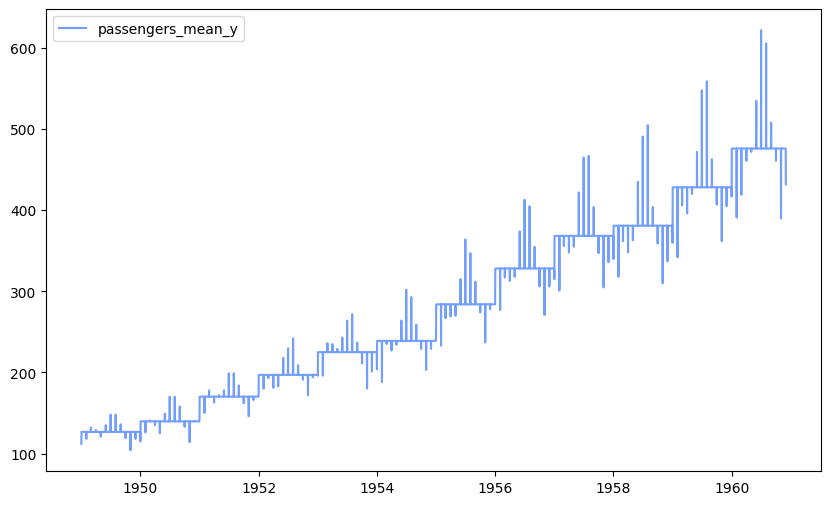

In [280]:
plt.figure(figsize=(10, 6))
plt.plot(df_resample_d_mean['date'], df_resample_d_mean['passengers_mean_y'].values, label='passengers_mean_y', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.legend()
plt.show()

Все NaN будем заменять на среднее за месяц

In [281]:
df_resample_d_mean_passengers_column = df_resample_d_mean.groupby(df_resample_d_mean["date"].dt.month)["#Passengers"]
df_resample_d_mean_passengers_column = df_resample_d_mean_passengers_column.transform(lambda x: x.fillna(x.mean()))

df_resample_d_mean["passengers_mean_m"] = df_resample_d_mean_passengers_column

df_resample_d_mean

,#Passengers,date,passengers_mean_y,passengers_mean_m
0,112.0,1949-01-01,112.000000,112.000000
1,NaN,1949-01-02,126.666667,241.750000
2,NaN,1949-01-03,126.666667,241.750000
3,NaN,1949-01-04,126.666667,241.750000
4,NaN,1949-01-05,126.666667,241.750000
...,...,...,...,...
4348,NaN,1960-11-27,476.166667,232.833333
4349,NaN,1960-11-28,476.166667,232.833333
4350,NaN,1960-11-29,476.166667,232.833333
4351,NaN,1960-11-30,476.166667,232.833333


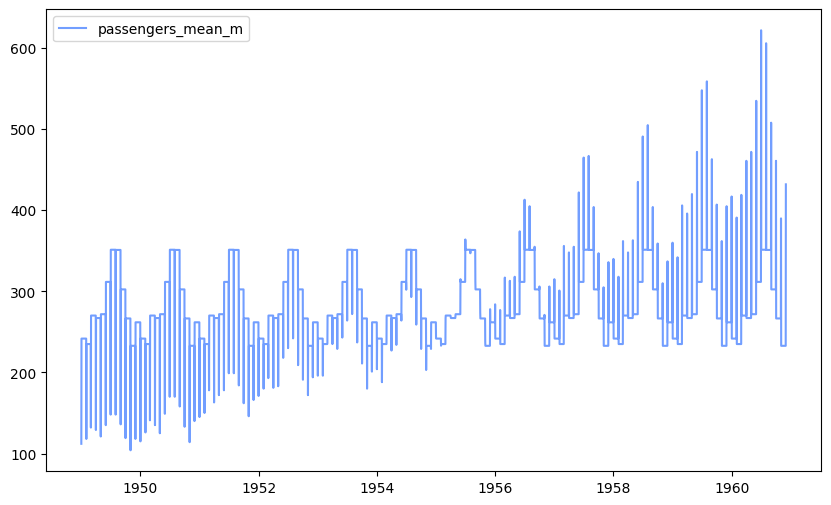

In [282]:
plt.figure(figsize=(10, 6))
plt.plot(df_resample_d_mean['date'], df_resample_d_mean['passengers_mean_m'].values, label='passengers_mean_m', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.legend()
plt.show()

In [283]:
df_resample_d_mean["passengers_sum_m"] = df_resample_d_mean.groupby(df_resample_d_mean["date"].dt.month)["#Passengers"].transform(lambda x: x.fillna(x.sum()))

df_resample_d_mean


,#Passengers,date,passengers_mean_y,passengers_mean_m,passengers_sum_m
0,112.0,1949-01-01,112.000000,112.000000,112.0
1,NaN,1949-01-02,126.666667,241.750000,2901.0
2,NaN,1949-01-03,126.666667,241.750000,2901.0
3,NaN,1949-01-04,126.666667,241.750000,2901.0
4,NaN,1949-01-05,126.666667,241.750000,2901.0
...,...,...,...,...,...
4348,NaN,1960-11-27,476.166667,232.833333,2794.0
4349,NaN,1960-11-28,476.166667,232.833333,2794.0
4350,NaN,1960-11-29,476.166667,232.833333,2794.0
4351,NaN,1960-11-30,476.166667,232.833333,2794.0


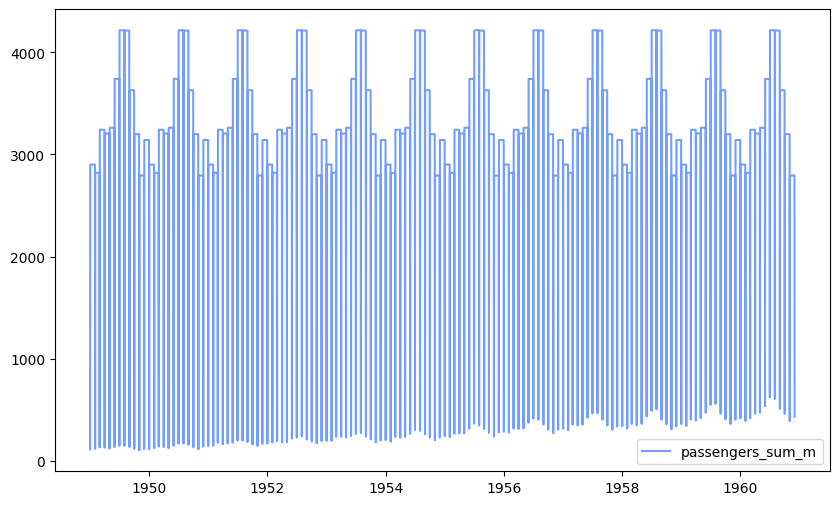

In [284]:
plt.figure(figsize=(10, 6))
plt.plot(df_resample_d_mean['date'], df_resample_d_mean['passengers_sum_m'].values, label='passengers_sum_m', color=ENUM_COLORS['BLUE'], linestyle='-')

plt.legend()
plt.show()

## ИТОГ

По моему мнению, лучше всего подходит замена среднем за год значениями